# AIMET Enviroment Set up (colab)

In [ ]:
!pip3 uninstall protobuf

!pip3 uninstall tensorflow

!apt-get update

!apt-get install python3.6

!apt-get install python3-dev

!apt-get install python3-pip

!apt-get install liblapacke liblapacke-dev

!apt-get install wget

!pip3 install numpy==1.16.4

!apt-get install libgtest-dev build-essential

%cd /content/
!wget https://github.com/Kitware/CMake/releases/download/v3.19.3/cmake-3.19.3-Linux-x86_64.sh
!sh cmake-3.19.3-Linux-x86_64.sh  --skip-license
%rm -rf /usr/local/bin/cmake
%rm -rf /usr/local/bin/cpack
%rm -rf /usr/local/bin/ctest


!ln -s /content/bin/cmake /usr/local/bin/cmake
!ln -s /content/bin/ctest /usr/local/bin/ctest
!ln -s /content/bin/cpack /usr/local/bin/cpack

!pip3 --no-cache-dir install opencv-python==4.1.0.25

!pip3 --no-cache-dir install pillow==6.2.1

!pip3 install pytorch-ignite==0.1.2

!wget -q https://github.com/Itseez/opencv/archive/3.1.0.tar.gz -O /tmp/3.1.0.tar.gz > /dev/null

!tar -C /tmp -xvf /tmp/3.1.0.tar.gz > /dev/null

%cd /tmp/opencv-3.1.0

%mkdir release

%cd release

!cmake -DCMAKE_POSITION_INDEPENDENT_CODE=ON -DBUILD_SHARED_LIBS=OFF -DCMAKE_BUILD_TYPE=release -DWITH_FFMPEG=OFF -DBUILD_TESTS=OFF -DWITH_CUDA=OFF -DBUILD_PERF_TESTS=OFF -DWITH_IPP=OFF -DENABLE_PRECOMPILED_HEADERS=OFF .. > /dev/null

!make -j16 > /dev/null

!make -j16 install > /dev/null

!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb

!apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub

!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb

!apt-get update

!wget http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb

!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb

!apt-get update

!apt install cuda-cublas-10-0 cuda-cufft-10-0 cuda-curand-10-0 cuda-cusolver-10-0

!apt-get update && apt install cuda-cusparse-10-0 libcudnn7=7.6.2.24-1+cuda10.0 libnccl2=2.4.8-1+cuda10.0  cuda-command-line-tools-10.0

!pip3 install scipy==1.2.1

!pip3 install protobuf==3.7.1

!pip3 install scikit-learn==0.21.0

!pip3 install tensorboardX==1.7

!pip3 install https://download.pytorch.org/whl/cu100/torch-1.4.0%2Bcu100-cp36-cp36m-linux_x86_64.whl

!pip3 install https://download.pytorch.org/whl/cu100/torchvision-0.5.0%2Bcu100-cp36-cp36m-linux_x86_64.whl

!pip3 install --upgrade pip

!pip3 install tensorflow-gpu==1.15.0

!pip3 install future==0.17.1

!pip3 install tensorboard==1.15

!pip3 install bokeh==1.2.0

!pip3 install pandas==0.22.0

!pip3 install holoviews==1.12.7

!pip3 install --no-deps bokeh==1.2.0 hvplot==0.4.0

!pip3 install jsonschema==3.1.1

!pip3 install osqp onnx

!ln -s /usr/local/cuda-10.0 /usr/local/cuda

!apt-get update && apt-get install -y libjpeg8-dev

!ln -s /usr/lib/x86_64-linux-gnu/libjpeg.so /usr/lib

!apt install zlib1g-dev

!pip3 uninstall Pillow && pip3 install Pillow-SIMD==6.2.2.post1

!pip3 uninstall pytest

!pip3 install pytest

!pip3 install setuptools==41.0.1

!pip3 install keras==2.2.4

%rm -rf /usr/local/bin/python

!ln -s /usr/bin/python3 /usr/local/bin/python

In [ ]:
%cd /content/

!mkdir aimet_code

%cd aimet_code

!git clone https://github.com/quic/aimet.git

%cd aimet

%mkdir -p ./ThirdParty/googletest

%pushd ./ThirdParty/googletest

!git clone https://github.com/google/googletest.git -b release-1.8.0 googletest-release-1.8.0

%popd

%cd /content/aimet_code

%mkdir build

%cd build

!cmake -DCMAKE_EXPORT_COMPILE_COMMANDS=ON ../aimet

!make -j 8

In [3]:
!sudo ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
!sudo make install

In [ ]:
!make packageaimet

In [ ]:
import os
os.environ['SRC_URL'] = 'https://raw.githubusercontent.com/quic/aimet/develop/packaging/google_colab/'
!curl ${SRC_URL}reqs_deb_common.txt | xargs apt-get --assume-yes install
!curl ${SRC_URL}reqs_deb_torch_gpu.txt | xargs apt-get --assume-yes --allow-change-held-packages install

In [ ]:
!wget ${SRC_URL}reqs_pip_torch_gpu.txt
!pip3 install -r reqs_pip_torch_gpu.txt -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
#import os
os.environ['release_tag']="1.16.2.py37"
!pip3 install https://github.com/quic/aimet/releases/download/${release_tag}/AimetCommon-torch_gpu_${release_tag}-cp37-cp37m-linux_x86_64.whl
!pip3 install https://github.com/quic/aimet/releases/download/${release_tag}/AimetTorch-torch_gpu_${release_tag}-cp37-cp37m-linux_x86_64.whl

In [ ]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

# After Run time -> restart  

In [1]:
import sys
sys.path.append('/usr/local/lib/python3.7/dist-packages/aimet_common/x86_64-linux-gnu')
sys.path.append('/usr/local/lib/python3.7/dist-packages/aimet_common/x86_64-linux-gnu/aimet_tensor_quantizer-0.0.0-py3.7-linux-x86_64.egg/')

import os
os.environ['LD_LIBRARY_PATH'] +=':/usr/local/lib/python3.6/dist-packages/aimet_common/x86_64-linux-gnu'


In [2]:
import torch
from torchvision import models
from aimet_torch.quantsim import QuantizationSimModel
# m = models.resnet18().cuda()
# # 이미지 input 3*224*224
# sim = QuantizationSimModel(m, dummy_input=torch.rand(1, 3, 224, 224).cuda())
# print(sim)


2022-01-27 15:53:54,180 - root - INFO - AIMET


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd "/content/drive/MyDrive/22WinterIntern/coin"

/content/drive/MyDrive/22WinterIntern/coin


In [5]:
from siren import Siren

In [6]:
# siren model
func_rep = Siren(
    dim_in=2,
    dim_hidden=28,
    dim_out=3,
    num_layers=10,
    final_activation=torch.nn.Identity(),
    w0_initial=30.0,
    w0=30.0
    ).to(torch.device('cuda'))

In [7]:
sim_siren = QuantizationSimModel(func_rep,dummy_input=torch.rand(10, 2).to('cuda'),default_output_bw=8,
                               default_param_bw=8)
print(sim_siren.model)

2022-01-27 15:54:06,207 - Quant - INFO - No config file provided, defaulting to config file at /usr/local/lib/python3.7/dist-packages/aimet_common/quantsim_config/default_config.json
Siren(
  (net): Sequential(
    (0): SirenLayer(
      (linear): StaticGridQuantWrapper(
        (_module_to_wrap): Linear(in_features=2, out_features=28, bias=True)
      )
      (activation): StaticGridQuantWrapper(
        (_module_to_wrap): Sine()
      )
    )
    (1): SirenLayer(
      (linear): StaticGridQuantWrapper(
        (_module_to_wrap): Linear(in_features=28, out_features=28, bias=True)
      )
      (activation): StaticGridQuantWrapper(
        (_module_to_wrap): Sine()
      )
    )
    (2): SirenLayer(
      (linear): StaticGridQuantWrapper(
        (_module_to_wrap): Linear(in_features=28, out_features=28, bias=True)
      )
      (activation): StaticGridQuantWrapper(
        (_module_to_wrap): Sine()
      )
    )
    (3): SirenLayer(
      (linear): StaticGridQuantWrapper(
        (_mo

In [54]:
#sim_siren.compute_encodings(forward_pass_callback=evaluate_model, forward_pass_callback_args=400)

# coin

In [8]:
import argparse
import getpass
import imageio
import json
import os
import random
import torch
import util
#from siren import Siren
from torchvision import transforms
from torchvision.utils import save_image
from training import Trainer

In [9]:
# Set up torch and cuda
dtype = torch.float32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.set_default_tensor_type('torch.cuda.FloatTensor' if torch.cuda.is_available() else 'torch.FloatTensor')

In [10]:
# Set random seeds
torch.manual_seed(random.randint(1, int(1e6)))
torch.cuda.manual_seed_all(random.randint(1, int(1e6)))

In [11]:
# Dictionary to register mean values (both full precision and half precision)
results = {'fp_bpp':[],'fp_psnr':[],'sim_bpp': [], 'sim_psnr': []}

In [12]:
img = imageio.imread("/content/drive/MyDrive/22WinterIntern/coin/kodak-dataset/kodim03.png")

In [13]:
img = transforms.ToTensor()(img).float().to(device, dtype)

Model size: 29.9kB
Full precision bpp: 0.61


100%|███████████████| 50000/50000 [39:21<00:00, 21.17it/s, best_psnr=31.3, loss=0.000835, psnr=30.8]


Best training psnr: 31.29


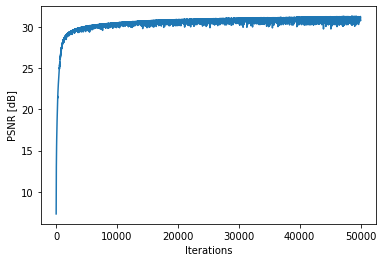

In [14]:
# Set up training
trainer = Trainer(func_rep, lr=2e-4)
coordinates, features = util.to_coordinates_and_features(img)
coordinates, features = coordinates.to(device, dtype), features.to(device, dtype)

# Calculate model size. Divide by 8000 to go from bits to kB
model_size = util.model_size_in_bits(func_rep) / 8000.
print(f'Model size: {model_size:.1f}kB')
fp_bpp = util.bpp(model=func_rep, image=img)
print(f'Full precision bpp: {fp_bpp:.2f}')

# Train model in full precision
trainer.train(coordinates, features, num_iters=50000, show=True)
print(f'Best training psnr: {trainer.best_vals["psnr"]:.2f}')

# Log full precision results
results['fp_bpp'].append(fp_bpp)
results['fp_psnr'].append(trainer.best_vals['psnr'])

# Save best model
torch.save(trainer.best_model, "/content/drive/MyDrive/22WinterIntern/coin/" + f'/best_model.pt')

# Update current model to be best model
func_rep.load_state_dict(trainer.best_model)

# Save full precision image reconstruction
with torch.no_grad():
    img_recon = func_rep(coordinates).reshape(img.shape[1], img.shape[2], 3).permute(2, 0, 1)
    save_image(torch.clamp(img_recon, 0, 1).to('cpu'), "/content/drive/MyDrive/22WinterIntern/coin/"+ f'/fp_reconstruction_.png')


In [15]:
fp32_loss = trainer.best_vals['loss']
print("==================================")
print("FP32 Loss = ",fp32_loss)
print("==================================")

FP32 Loss =  0.0007434511790052056


# Quantization Simulation Model : bw=8

In [14]:
sim_siren.compute_encodings(forward_pass_callback=Trainer(sim_siren.model, lr=2e-4),forward_pass_callback_args=None)

TypeError: ignored

100%|████████████████| 5000/5000 [4:56:50<00:00,  3.56s/it, best_psnr=21.8, loss=0.00667, psnr=21.8]


Best training psnr: 21.84


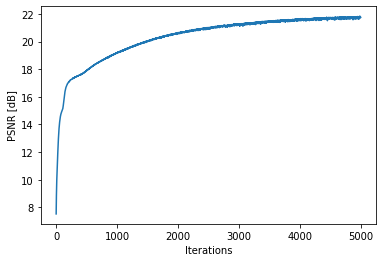

In [15]:
# Set up training
trainer_sim = Trainer(sim_siren.model, lr=2e-4)
coordinates, features = util.to_coordinates_and_features(img)
coordinates, features = coordinates.to(device, dtype), features.to(device, dtype)

# 시간이 너무 오래 걸려서 5000 iteration만..
trainer_sim.train(coordinates, features, num_iters=5000, show=True)
print(f'Best training psnr: {trainer_sim.best_vals["psnr"]:.2f}')

results['sim_psnr'].append(trainer_sim.best_vals['psnr'])

# Save best model
torch.save(trainer_sim.best_model, "/content/drive/MyDrive/22WinterIntern/coin/" + f'/trainer_sim_best_model.pt')

# Update current model to be best model
sim_siren.model.load_state_dict(trainer_sim.best_model)

# image reconstruction
with torch.no_grad():
    img_recon = sim_siren.model(coordinates).reshape(img.shape[1], img.shape[2], 3).permute(2, 0, 1)
    save_image(torch.clamp(img_recon, 0, 1).to('cpu'), "/content/drive/MyDrive/22WinterIntern/coin/"+ f'/sim_reconstruction_.png')


In [ ]:
sim_loss = trainer_sim.best_vals['loss']
print("==================================")
print("Simulation Model Loss = ",sim_loss)
print("==================================")

#==================================
#Simulation Model Loss =  0.006552986800670624
#==================================

In [53]:
sim_siren.model.net[9].activation.input_quantizer

In [49]:
sim_siren.model.net[9].activation.output_quantizer.bitwidth

8